Amazon Sales Analysis

In [1]:
#import Essential libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#Mrege data from each months into one csv
import os
path='./sales_data'
files=[file for file in os.listdir(path)]
all_months_data=pd.DataFrame()
for file in files:
    current_data=pd.read_csv(path+"/"+file)
    all_months_data=pd.concat([all_months_data,current_data])
all_months_data.to_csv('all_data.csv',index=False)
print('All csv files are merged in single csv files')

All csv files are merged in single csv files


In [3]:
#Read in updated dataframe 
all_data=pd.read_csv('all_data.csv')
all_data.head()

Order ID                     Product Quantity Ordered Price Each  \
0   176558        USB-C Charging Cable                2      11.95   
1      NaN                         NaN              NaN        NaN   
2   176559  Bose SoundSport Headphones                1      99.99   
3   176560                Google Phone                1        600   
4   176560            Wired Headphones                1      11.99   

       Order Date                      Purchase Address  
0  04/19/19 08:46          917 1st St, Dallas, TX 75001  
1             NaN                                   NaN  
2  04/07/19 22:30     682 Chestnut St, Boston, MA 02215  
3  04/12/19 14:38  669 Spruce St, Los Angeles, CA 90001  
4  04/12/19 14:38  669 Spruce St, Los Angeles, CA 90001

claen up data

In [4]:
all_data.isnull().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [5]:
#Drop the rows withs Nan values
all_data=all_data.dropna(how='all')
all_data.head()

Order ID                     Product Quantity Ordered Price Each  \
0   176558        USB-C Charging Cable                2      11.95   
2   176559  Bose SoundSport Headphones                1      99.99   
3   176560                Google Phone                1        600   
4   176560            Wired Headphones                1      11.99   
5   176561            Wired Headphones                1      11.99   

       Order Date                      Purchase Address  
0  04/19/19 08:46          917 1st St, Dallas, TX 75001  
2  04/07/19 22:30     682 Chestnut St, Boston, MA 02215  
3  04/12/19 14:38  669 Spruce St, Los Angeles, CA 90001  
4  04/12/19 14:38  669 Spruce St, Los Angeles, CA 90001  
5  04/30/19 09:27     333 8th St, Los Angeles, CA 90001

In [6]:
all_data.shape

(186305, 6)

In [7]:
#get rid of text of in 'Order Date column'
all_data=all_data[all_data['Order Date'].str[0:2]!='Or']

In [15]:
#make column correct type
all_data['Quantity Ordered']=pd.to_numeric(all_data['Quantity Ordered'])
all_data['Price Each']=pd.to_numeric(all_data['Price Each'])

In [16]:
#add months column
all_data['Month']=all_data['Order Date'].str[0:2]
all_data['Month']=all_data['Month'].astype('int32')
all_data.head()

Order ID                     Product  Quantity Ordered  Price Each  \
0   176558        USB-C Charging Cable                 2       11.95   
2   176559  Bose SoundSport Headphones                 1       99.99   
3   176560                Google Phone                 1      600.00   
4   176560            Wired Headphones                 1       11.99   
5   176561            Wired Headphones                 1       11.99   

       Order Date                      Purchase Address  Month  
0  04/19/19 08:46          917 1st St, Dallas, TX 75001      4  
2  04/07/19 22:30     682 Chestnut St, Boston, MA 02215      4  
3  04/12/19 14:38  669 Spruce St, Los Angeles, CA 90001      4  
4  04/12/19 14:38  669 Spruce St, Los Angeles, CA 90001      4  
5  04/30/19 09:27     333 8th St, Los Angeles, CA 90001      4

In [18]:
#Add sale column
all_data['Sales']=all_data['Quantity Ordered'].astype('int')*all_data['Price Each'].astype('float')
all_data.head()

Order ID                     Product  Quantity Ordered  Price Each  \
0   176558        USB-C Charging Cable                 2       11.95   
2   176559  Bose SoundSport Headphones                 1       99.99   
3   176560                Google Phone                 1      600.00   
4   176560            Wired Headphones                 1       11.99   
5   176561            Wired Headphones                 1       11.99   

       Order Date                      Purchase Address  Month   Sales  
0  04/19/19 08:46          917 1st St, Dallas, TX 75001      4   23.90  
2  04/07/19 22:30     682 Chestnut St, Boston, MA 02215      4   99.99  
3  04/12/19 14:38  669 Spruce St, Los Angeles, CA 90001      4  600.00  
4  04/12/19 14:38  669 Spruce St, Los Angeles, CA 90001      4   11.99  
5  04/30/19 09:27     333 8th St, Los Angeles, CA 90001      4   11.99

In [20]:
#Q.1) What was the test month for sales?
all_data.groupby(['Month']).sum()

Quantity Ordered    Price Each         Sales
Month                                              
1                 10903  1.811768e+06  1.822257e+06
2                 13449  2.188885e+06  2.202022e+06
3                 17005  2.791208e+06  2.807100e+06
4                 20558  3.367671e+06  3.390670e+06
5                 18667  3.135125e+06  3.152607e+06
6                 15253  2.562026e+06  2.577802e+06
7                 16072  2.632540e+06  2.647776e+06
8                 13448  2.230345e+06  2.244468e+06
9                 13109  2.084992e+06  2.097560e+06
10                22703  3.715555e+06  3.736727e+06
11                19798  3.180601e+06  3.199603e+06
12                28114  4.588415e+06  4.613443e+06

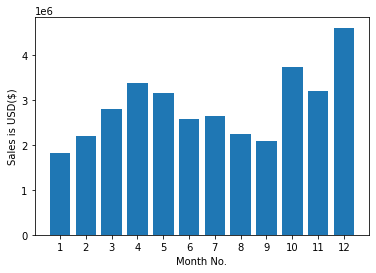

In [23]:
#data Visualization
months=range(1,13)
plt.bar(months,all_data.groupby(['Month']).sum()['Sales'])
plt.xticks(months)
plt.xlabel('Month No.')
plt.ylabel('Sales is USD($)')
plt.show()

In [27]:
#Add City colunm
def get_city(address):
    return address.split(",")[1].strip("")
def get_state(address):
    return address.split(",")[2].split(" ")[1]

In [30]:
all_data['City']=all_data['Purchase Address'].apply(lambda x:f"{get_city(x)}({get_state(x)})")
all_data.head()

Order ID                     Product  Quantity Ordered  Price Each  \
0   176558        USB-C Charging Cable                 2       11.95   
2   176559  Bose SoundSport Headphones                 1       99.99   
3   176560                Google Phone                 1      600.00   
4   176560            Wired Headphones                 1       11.99   
5   176561            Wired Headphones                 1       11.99   

       Order Date                      Purchase Address  Month   Sales  \
0  04/19/19 08:46          917 1st St, Dallas, TX 75001      4   23.90   
2  04/07/19 22:30     682 Chestnut St, Boston, MA 02215      4   99.99   
3  04/12/19 14:38  669 Spruce St, Los Angeles, CA 90001      4  600.00   
4  04/12/19 14:38  669 Spruce St, Los Angeles, CA 90001      4   11.99   
5  04/30/19 09:27     333 8th St, Los Angeles, CA 90001      4   11.99   

               City  
0        Dallas(TX)  
2        Boston(MA)  
3   Los Angeles(CA)  
4   Los Angeles(CA)  
5   Los Angeles(CA)

In [31]:
#Q.2) Which city sole the most product?
all_data.groupby(['City']).sum()


Quantity Ordered    Price Each   Month         Sales
City                                                                    
 Atlanta(GA)                   16602  2.779908e+06  104794  2.795499e+06
 Austin(TX)                    11153  1.809874e+06   69829  1.819582e+06
 Boston(MA)                    22528  3.637410e+06  141112  3.661642e+06
 Dallas(TX)                    16730  2.752628e+06  104620  2.767975e+06
 Los Angeles(CA)               33289  5.421435e+06  208325  5.452571e+06
 New York City(NY)             27932  4.635371e+06  175741  4.664317e+06
 Portland(ME)                   2750  4.471893e+05   17144  4.497583e+05
 Portland(OR)                  11303  1.860558e+06   70621  1.870732e+06
 San Francisco(CA)             50239  8.211462e+06  315520  8.262204e+06
 Seattle(WA)                   16553  2.733296e+06  104941  2.747755e+06

In [33]:
#plot a Bar Graph B/w sales and city 
keys=[city for city,df in all_data.groupby(['City'])]
print(keys)

[' Atlanta(GA)', ' Austin(TX)', ' Boston(MA)', ' Dallas(TX)', ' Los Angeles(CA)', ' New York City(NY)', ' Portland(ME)', ' Portland(OR)', ' San Francisco(CA)', ' Seattle(WA)']


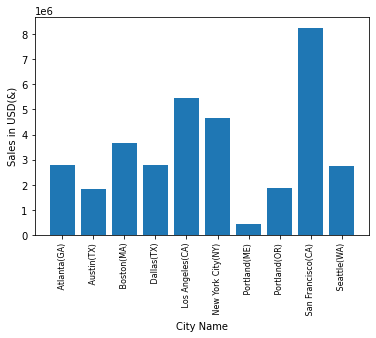

In [35]:
plt.bar(keys,all_data.groupby(['City']).sum()['Sales'])
plt.xlabel('City Name')
plt.ylabel('Sales in USD(&)')
plt.xticks(keys,rotation='vertical',size=8)
plt.show()